In [3]:
%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [13]:
filename = 'data/images/signatures/signature3.jpg'
filename = 'data/images/eye.jpg'
# filename = 'data/images/fingerprints/fingerprint41.jpg'
img = np.asarray(Image.open(filename))

In [5]:
def get_grey(rgb):
    return (0.2126*rgb[:,:,0]+0.7152*rgb[:,:,1]+0.0722*rgb[:,:,2])\
           .astype(np.uint8)

In [6]:
def return_uint8(func):
    def func_wrapper(*args):
        output = func(*args)
        return output.astype(np.uint8)
    return func_wrapper

def return_float32(func):
    def func_wrapper(*args):
        output = func(*args)
        return output.astype(np.float32)
    return func_wrapper
@return_uint8
def get_grey_image(img):
    return np.apply_along_axis(_pixel2gray, -1, img)
def _pixel2gray(pixel):
    grey = int(sum(pixel) // 3)  # Average of 3 colors
    return [grey] * len(pixel)

def get_global_thresholding(img, threshold):
    # http://www.cse.iitd.ernet.in/~pkalra/col783/Thresholding.pdf
    img = get_grey_image(img)
    return np.apply_along_axis(_threshold, -1, img, threshold)
def _threshold(pixel, threshold):
    return [1. if color > threshold else 0. for color in pixel]

In [7]:
def otsu_threshold(im):
    pixel_counts = [np.sum(im == i) for i in range(256)]
    s_max = (0,-10)
    ss = []
    for threshold in range(256):
        # update
        w_0 = sum(pixel_counts[:threshold])
        w_1 = sum(pixel_counts[threshold:])
        mu_0 = sum([i * pixel_counts[i] for i in range(0,threshold)]) / w_0 if w_0 > 0 else 0       
        mu_1 = sum([i * pixel_counts[i] for i in range(threshold, 256)]) / w_1 if w_1 > 0 else 0
        # calculate 
        s = w_0 * w_1 * (mu_0 - mu_1) ** 2
        ss.append(s)
        if s > s_max[1]:
            s_max = (threshold, s)         
    return s_max[0]

(287, 500)
uint8


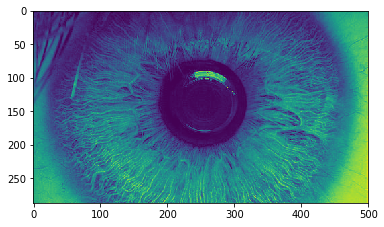

In [18]:
a = get_grey(img)
print(a.shape)
print(a.dtype)
plt.imshow(a)

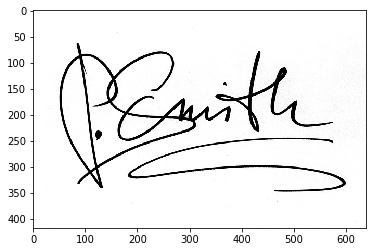

In [166]:
imshow(img)

Threshold: 134
(418, 640, 3)


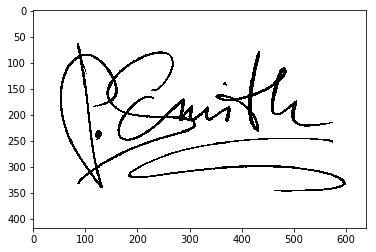

In [167]:
threshold = otsu_threshold(img)
print("Threshold: {}".format(threshold))
binarized = get_global_thresholding(img, threshold)
imshow(binarized)
print(binarized.shape)

In [176]:
def kmm(img):
    d = 2
    result = np.ndarray(img.shape)
    print(img.shape)
    
    for idx in np.ndindex(img.shape[:d]):
        i, j = idx
        if img[i,j].all() == 1.:
            result[i,j] = [1.,1.,1.]
            neighbours = img[i-1:i+2,j-1:j+2]
        try:
            if neighbours[0][1].all() == 0 or neighbours[1][0].all() == 0 or neighbours[1][2].all() == 0 or neighbours[2][1].all() == 0:
                result[i,j] = 2
            else:
                if neighbours[0][0].all() == 0 or neighbours[0][2].all() == 0 or neighbours[2][0].all() == 0 or neighbours[2][2].all() == 0:
                    result[i,j] = 3
        except IndexError:
            pass
        
a = kmm(binarized)
# imshow(a)

(418, 640, 3)
